In [623]:
import sys

sys.path.append("...")

import Essentials
import Visualizer_pred

In [624]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pandas as pd

In [625]:
data_archive = np.load('Data_First_Nikita.npz', allow_pickle=True)

In [626]:
def prepare_Y(y):
    timestamp = y[:, 1]
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

ALL_column_names_1 = data_archive['column_names_1']
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

ALL_column_names_2 = data_archive['column_names_2_cat']
all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

ALL_column_names_3 = data_archive['column_names_3_cat']
all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

column_names_2 = data_archive['column_names_2']
x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

column_names_3 = data_archive['column_names_3']
x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

x_train, x_test, y_train, y_test=train_test_split(all_X_1, all_Y_1, test_size=0.2, random_state=42)

y_train, timestamp_train = prepare_Y(y_train)
sorted_indices_train = np.argsort(timestamp_train)
y_train = y_train[sorted_indices_train]
timestamp_train = timestamp_train[sorted_indices_train]
x_train = x_train[sorted_indices_train]

y_test, timestamp_test = prepare_Y(y_test)

x_test1, x_val, y_test1, y_val, timestamp_test1, timestamp_val = train_test_split(
    x_test, y_test, timestamp_test, test_size=0.5, random_state=42
)

sorted_indices_test = np.argsort(timestamp_test)
y_test = y_test[sorted_indices_test]
timestamp_test = timestamp_test[sorted_indices_test]
x_test = x_test[sorted_indices_test]

print(all_X_1.shape)
print(all_Y_1.shape)
print(x_train.shape)
print(y_test.shape)

x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_3, y_winter_half_3, test_size=0.2, random_state=42)
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_3, y_summer_half_3, test_size=0.2, random_state=42)

y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)
sorted_indices_train_summer = np.argsort(timestamp_train_summer)
y_train_summer = y_train_summer[sorted_indices_train_summer]
timestamp_train_summer = timestamp_train_summer[sorted_indices_train_summer]
x_train_summer = x_train_summer[sorted_indices_train_summer]

y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)
sorted_indices_train_winter = np.argsort(timestamp_train_winter)
y_train_winter = y_train_winter[sorted_indices_train_winter]
timestamp_train_winter = timestamp_train_winter[sorted_indices_train_winter]
x_train_winter = x_train_winter[sorted_indices_train_winter]

y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)
sorted_indices_test_summer = np.argsort(timestamp_test_summer)
y_test_summer = y_test_summer[sorted_indices_test_summer]
timestamp_test_summer = timestamp_test_summer[sorted_indices_test_summer]
x_test_summer = x_test_summer[sorted_indices_test_summer]

y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)
sorted_indices_test_winter = np.argsort(timestamp_test_winter)
y_test_winter = y_test_winter[sorted_indices_test_winter]
timestamp_test_winter = timestamp_test_winter[sorted_indices_test_winter]
x_test_winter = x_test_winter[sorted_indices_test_winter]

column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

column_names_X1.pop()
column_names_X2.pop()
column_names_X3.pop()

feature_names_1 = column_names_X1
feature_names_2 = column_names_X2
feature_names_3 = column_names_X3

target_name_1 = column_name_Y1
target_name_2 = column_name_Y2
target_name_3 = column_name_Y3

(107, 87)
(107, 2)
(85, 87)
(22, 1)


In [627]:
class svm(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = SVR(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)
        
    def equation(self, feature_names, target_name):
        weights = self.model.coef_[0]
        intercept = self.model.intercept_[0]
        equation = f"{target_name} = {intercept:.2f}"

        for i, feature_name in enumerate(feature_names):
            equation += f" + ({weights[i]:.2f}) * {feature_name}"
            if len(feature_names) != len(weights):
                print(f"Количество признаков ({len(feature_names)}) не совпадает с количеством весов ({len(weights)}).")
        return equation        
    def __str__(self):
        pass

In [628]:
test_soft_sensor = svm(x_train, y_train, kernel='linear', C=0.3, epsilon= 0.5)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [629]:
print(test_soft_sensor.equation(ALL_column_names_1, target_name_1))

Давление насыщенных паров в зимний период = 57.70 + (0.27) * Расход бензина ККР на установку + (0.02) * Расход нафты ККР на установку + (-0.32) * Расход бензина на рециркуляцию от Е-1205 + (-0.14) * Температура бензина ККР на установку + (0.31) * Расход сырья после Р-1101 + (-0.27) * Показатель соотношения водород к углероду + (0.02) * Расход водорода на смешение перед Е-1101 + (0.30) * Температура сырья перед Е-1101 + (-0.39) * Давление сырья перед Е-1101 + (-0.12) * Температура сырья перед Е-1102 + (0.30) * Температура сырья перед Е-1103 + (-0.51) * Давление сырья перед Е-1103 + (0.30) * Температура сырья после Е-1103 + (0.16) * Температура ТБ перед Е-1101 + (-0.05) * Температура ТБ после Е-1101 + (0.28) * Температура бензина перед Е-1102 + (0.20) * Температура бензина после Е-1102 + (-0.60) * Давление бензина после Е-1102 + (-0.21) * Температура пара перед Е-1103 + (0.52) * Давление пара перед Е-1103 + (0.28) * Температура на входе в R-1101 + (-0.63) * Температура на входе в С-1101 

In [630]:
metric = Essentials.R2Metric()

In [631]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Support Vector Model SoftSensor R2 metric on Test')

      Coefficient of determination
Test                      0.749493


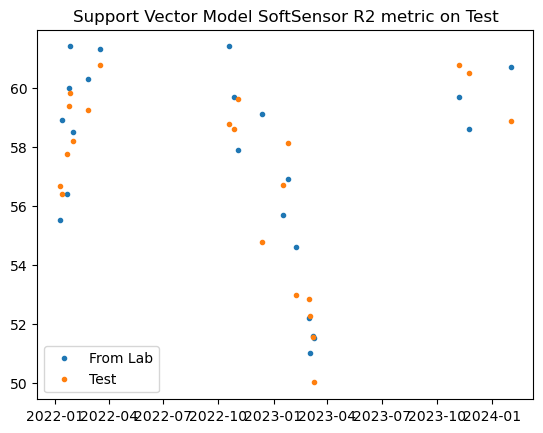

In [632]:
test_visual.visualize([test_soft_sensor])

In [633]:
test_visual=Visualizer_pred.Visualizer(x_test, y_test, timestamp_test,[metric], 'Test SVM Sensor R2 metric')

+------+--------------------------------+---------+
|      |   Coefficient of determination |     MSE |
+======+================================+=========+
| Test |                       0.749493 | 2.77755 |
+------+--------------------------------+---------+


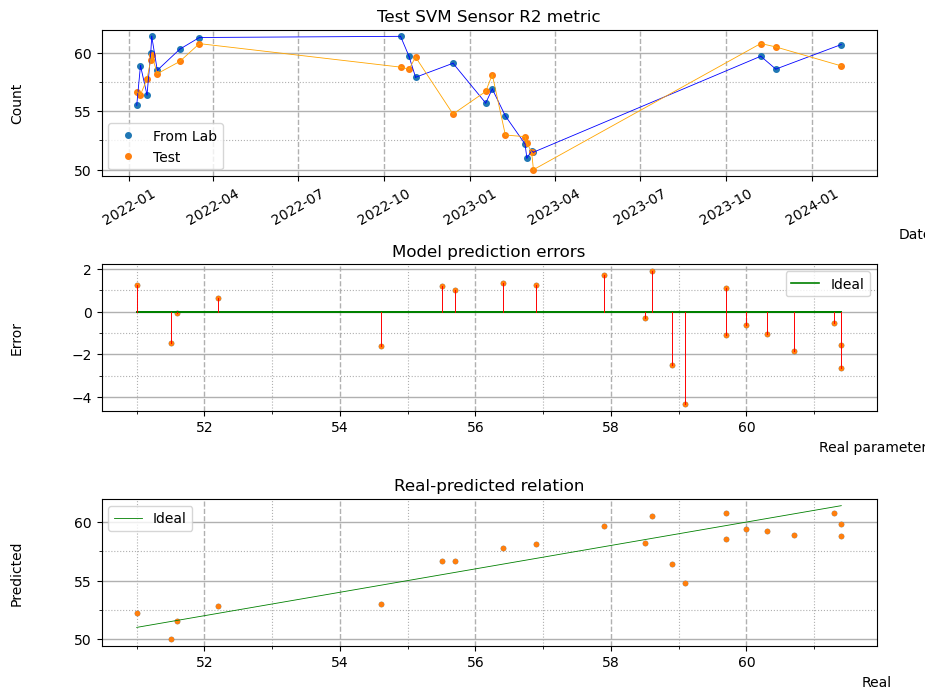

In [634]:
test_visual.visualize([test_soft_sensor], lines=True, lines_vertical=True)